# Task 1
## Exploratory data analysis
Data set: IPL Auction data set




###Step 1: Import packages

In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [43]:
from scipy import stats as st
import warnings
warnings.filterwarnings("ignore")

### Step 2: Import and understanding of the dataset

In [44]:
dataset=pd.read_csv("/content/ipl_2022_dataset.csv", index_col=0)

In [45]:
dataset.head()

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team
0,Rashid Khan,Draft Pick,BOWLER,15.0,1950.0,SRH,Gujarat Titans
1,Hardik Pandya,Draft Pick,ALL-ROUNDER,15.0,1950.0,MI,Gujarat Titans
2,Lockie Ferguson,2 Cr,BOWLER,10.0,1300.0,KKR,Gujarat Titans
3,Rahul Tewatia,40 Lakh,ALL-ROUNDER,9.0,1170.0,RR,Gujarat Titans
4,Shubman Gill,Draft Pick,BATTER,8.0,1040.0,KKR,Gujarat Titans


In [46]:
dataset.tail()

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team
628,Sairaj Patil,20 Lakh,BATTER,NaN,NaN,NaN,Unsold
629,Monu Singh,20 Lakh,BOWLER,NaN,NaN,NaN,Unsold
630,Nivethan Radhakrishnan,20 Lakh,BOWLER,NaN,NaN,NaN,Unsold
631,Lance Morris,20 Lakh,BOWLER,NaN,NaN,NaN,Unsold
632,Aaron Hardie,20 Lakh,ALL-ROUNDER,NaN,NaN,NaN,Unsold


In [47]:
dataset.shape

(633, 7)

In [48]:
dataset.columns

Index(['Player', 'Base Price', 'TYPE', 'COST IN ₹ (CR.)', 'Cost IN $ (000)',
       '2021 Squad', 'Team'],
      dtype='object')

In [49]:
df=dataset.info()
print(df)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 633 entries, 0 to 632
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Player           633 non-null    object 
 1   Base Price       633 non-null    object 
 2   TYPE             633 non-null    object 
 3   COST IN ₹ (CR.)  237 non-null    float64
 4   Cost IN $ (000)  237 non-null    float64
 5   2021 Squad       199 non-null    object 
 6   Team             633 non-null    object 
dtypes: float64(2), object(5)
memory usage: 39.6+ KB
None


In [50]:
dataset_sold= dataset[dataset["Team"]!="Unsold"]

In [51]:
dataset_sold.tail()

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team
232,Priyam Garg,20 Lakh,BATTER,0.2,26.0,SRH,Sunrisers Hyderabad
233,R Samarth,20 Lakh,BATTER,0.2,26.0,NaN,Sunrisers Hyderabad
234,Jagadeesha Suchith,20 Lakh,BOWLER,0.2,26.0,SRH,Sunrisers Hyderabad
235,Shashank Singh,20 Lakh,ALL-ROUNDER,0.2,26.0,NaN,Sunrisers Hyderabad
236,Saurabh Dubey,20 Lakh,BOWLER,0.2,26.0,NaN,Sunrisers Hyderabad


In [52]:
dataset_sold.shape

(237, 7)

In [53]:
dataset_unsold = dataset[dataset["Team"]=="Unsold"]

In [54]:
dataset_unsold.shape

(396, 7)

In [55]:
array1= []
for i in dataset["Team"]:
  if i!="Unsold":
    array1.append(1)
  else:
    array1.append(0)
dataset["sold"]= np.array(array1)

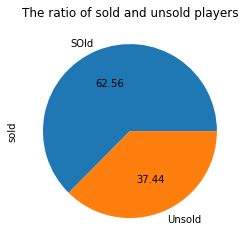

In [56]:
dataset["sold"].value_counts().plot(kind="pie" ,labels=["SOld", "Unsold"], autopct="%.2f")
plt.title("The ratio of sold and unsold players")
plt.show()

###Step 3: EDA on Selected players


In [57]:
dataset_sold.head()

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team
0,Rashid Khan,Draft Pick,BOWLER,15.0,1950.0,SRH,Gujarat Titans
1,Hardik Pandya,Draft Pick,ALL-ROUNDER,15.0,1950.0,MI,Gujarat Titans
2,Lockie Ferguson,2 Cr,BOWLER,10.0,1300.0,KKR,Gujarat Titans
3,Rahul Tewatia,40 Lakh,ALL-ROUNDER,9.0,1170.0,RR,Gujarat Titans
4,Shubman Gill,Draft Pick,BATTER,8.0,1040.0,KKR,Gujarat Titans


In [58]:
dataset_sold.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 237 entries, 0 to 236
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Player           237 non-null    object 
 1   Base Price       237 non-null    object 
 2   TYPE             237 non-null    object 
 3   COST IN ₹ (CR.)  237 non-null    float64
 4   Cost IN $ (000)  237 non-null    float64
 5   2021 Squad       159 non-null    object 
 6   Team             237 non-null    object 
dtypes: float64(2), object(5)
memory usage: 14.8+ KB


 Most of the players price is around 0.2-2.5 cr


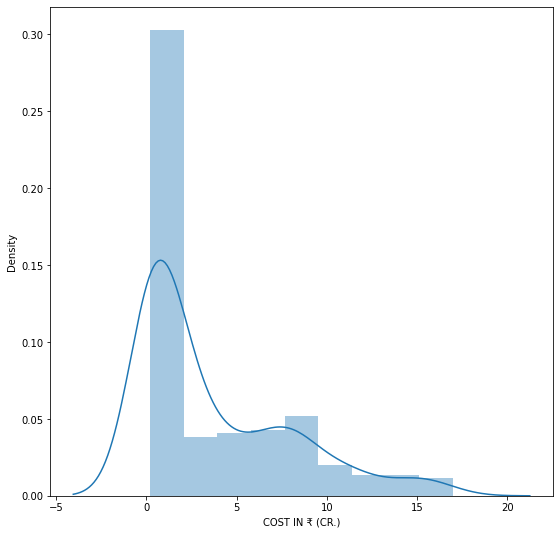

In [59]:
plt.figure(figsize=(9,9))
sns.distplot(dataset_sold["COST IN ₹ (CR.)"])


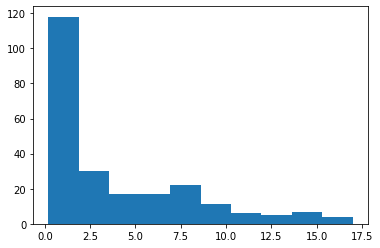

In [60]:
plt.hist(dataset_sold["COST IN ₹ (CR.)"])
plt.show()

most of the players price is from 0.2 - 3.6 cr




In [61]:
dataset_sold.mean()

COST IN ₹ (CR.)      3.695781
Cost IN $ (000)    480.451477
dtype: float64

In [62]:
dataset_sold.describe()

,COST IN ₹ (CR.),Cost IN $ (000)
count,237.000000,237.000000
mean,3.695781,480.451477
std,4.238092,550.951945
min,0.200000,26.000000
25%,0.400000,52.000000
50%,1.900000,247.000000
75%,6.500000,845.000000
max,17.000000,2210.000000


####checking for outliers

In [63]:
dataset_sold["COST IN ₹ (CR.)"].unique()

array([15.  , 10.  ,  9.  ,  8.  ,  6.25,  3.2 ,  3.  ,  2.6 ,  2.4 ,
        2.  ,  1.9 ,  1.7 ,  1.4 ,  1.1 ,  0.5 ,  0.3 ,  0.2 , 16.  ,
       14.  , 12.  ,  6.75,  6.  ,  4.4 ,  4.  ,  3.6 ,  1.5 ,  1.2 ,
        1.  ,  0.7 , 10.75,  7.5 ,  6.5 ,  5.25,  4.2 ,  2.8 ,  0.65,
       12.25,  7.25,  0.6 ,  0.55,  0.4 , 11.5 ,  9.25,  8.25,  3.8 ,
        0.75,  0.25, 17.  ,  9.2 ,  8.75,  5.75,  4.6 ,  0.9 , 15.25,
        1.6 ,  1.3 , 11.  ,  7.75,  7.  ,  5.5 ,  3.4 ,  0.95,  0.8 ,
        8.5 ,  5.  ])

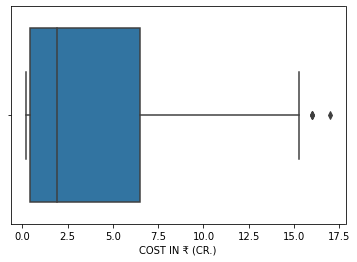

In [64]:
sns.boxplot(dataset_sold["COST IN ₹ (CR.)"])

In [65]:
new_dataset=dataset_sold[dataset_sold["COST IN ₹ (CR.)"]<=15]


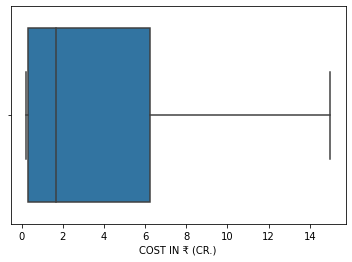

In [66]:
sns.boxplot(new_dataset["COST IN ₹ (CR.)"])

In [67]:
new_dataset["COST IN ₹ (CR.)"].describe()

count    232.000000
mean       3.429526
std        3.868938
min        0.200000
25%        0.300000
50%        1.650000
75%        6.250000
max       15.000000
Name: COST IN ₹ (CR.), dtype: float64

From the above plot we can say that

mean of the player price is 3.42cr

minimum price of player is 0.2cr

25% percentile of the player's price is 0.3cr 

50% percentile of the player's price  is 1.65cr

75% percentile of the player's price is 6.25cr

####Each Team budget

In [68]:
data_team_budget=dataset_sold.iloc[:,[3,6]] #Selecting two columns from the dataset_sold dataset

In [69]:
data_team_budget.head()

,COST IN ₹ (CR.),Team
0,15.0,Gujarat Titans
1,15.0,Gujarat Titans
2,10.0,Gujarat Titans
3,9.0,Gujarat Titans
4,8.0,Gujarat Titans


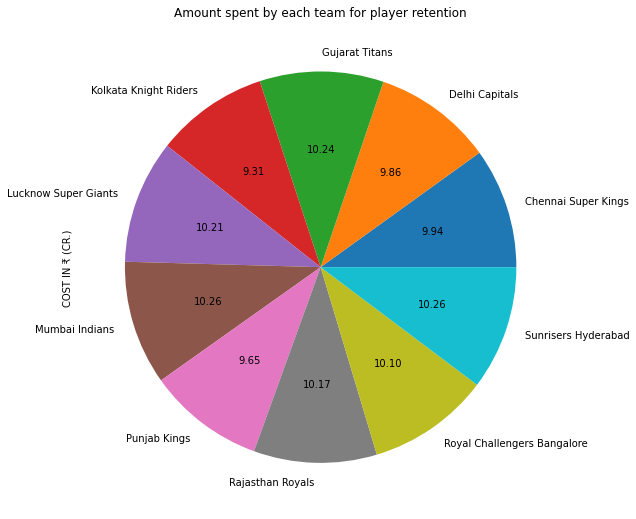

In [82]:
# data_budget= data_team_budget.groupby(data_team_budget["Team"])
piechart=data_team_budget.groupby("Team").sum()["COST IN ₹ (CR.)"].plot( kind="pie",autopct="%.2f", figsize=(9,9), title="Amount spent by each team for player retention")
plt.show()

Inference from the above pie chart 

Mumbai Indians and sunrisers Hyderabad has highest budget : 10.26 cr

Kolkata knight rider has least budget : 9.31cr

#### Type of players


In [71]:
bar_plot=pd.crosstab(dataset_sold["Team"],dataset_sold["TYPE"])


In [72]:
bar_plot.head()

TYPE,ALL-ROUNDER,BATTER,BOWLER,WICKETKEEPER
Team,,,,
Chennai Super Kings,9,5,8,3
Delhi Capitals,9,5,7,3
Gujarat Titans,8,4,8,2
Kolkata Knight Riders,10,7,5,3
Lucknow Super Giants,9,3,8,2


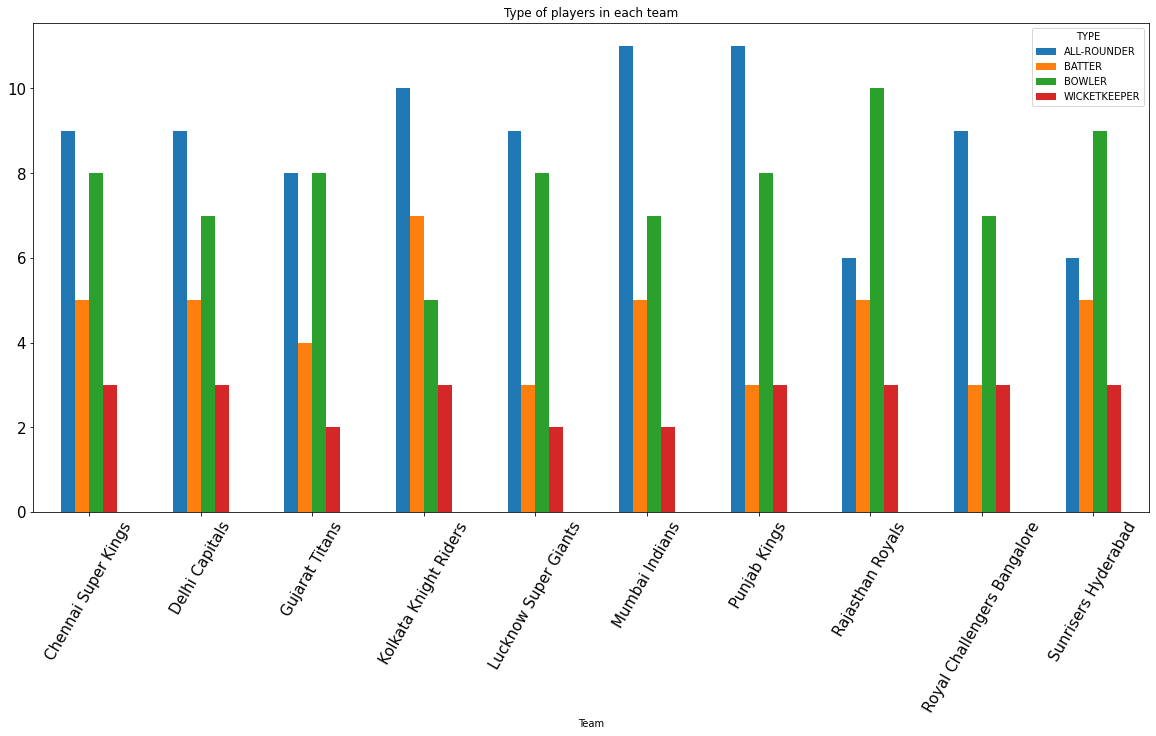

In [73]:
bar_plot.plot(kind="bar", figsize=(20,9), fontsize=15,rot=60,title="Type of players in each team")

plt.show()

From the above chart we observe that


1)Mumbai indians and punjab kings have more all rounder players

2) Rajasthan Royals has more number of bowlers

3) kolkata knight riders has more number of batter


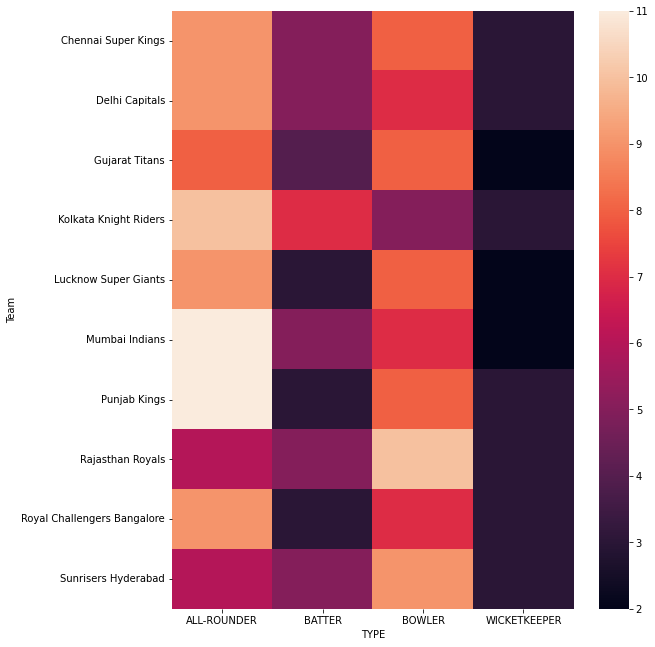

In [74]:
plt.figure(figsize=(9,11))
sns.heatmap(pd.crosstab(dataset_sold["Team"],dataset_sold["TYPE"]))


### Step 4: EDA Not selected player

In [75]:
dataset_unsold=dataset[dataset["Team"]=="Unsold"]

In [76]:
dataset_unsold.head()

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team,sold
237,Suresh Raina,2 Cr,BATTER,NaN,NaN,CSK,Unsold,0
238,Steve Smith,2 Cr,BATTER,NaN,NaN,DC,Unsold,0
239,Shakib Al Hasan,2 Cr,ALL-ROUNDER,NaN,NaN,KKR,Unsold,0
240,Amit Mishra,1.5 Cr,BOWLER,NaN,NaN,DC,Unsold,0
241,Adil Rashid,2 Cr,BOWLER,NaN,NaN,PBKS,Unsold,0


In [77]:
dataset_unsold.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 396 entries, 237 to 632
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Player           396 non-null    object 
 1   Base Price       396 non-null    object 
 2   TYPE             396 non-null    object 
 3   COST IN ₹ (CR.)  0 non-null      float64
 4   Cost IN $ (000)  0 non-null      float64
 5   2021 Squad       40 non-null     object 
 6   Team             396 non-null    object 
 7   sold             396 non-null    int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 27.8+ KB


In [78]:
bar1=pd.crosstab(dataset_unsold["TYPE"],dataset_unsold["sold"])

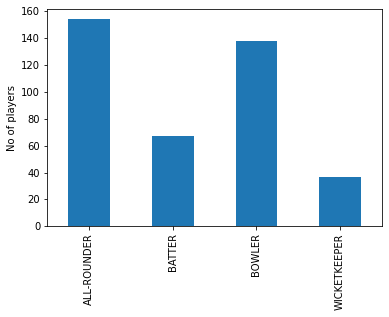

In [79]:
bar1.plot(kind="bar", legend=False)
plt.ylabel("No of players")
plt.xlabel("")
plt.show()

The above graph represents the types in no of unsold players